In [20]:
import pandas as pd 
import numpy as np

In [22]:
df = pd.read_excel('ex8data1.xlsx', sheet_name='X', header=None)
df.head()

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849


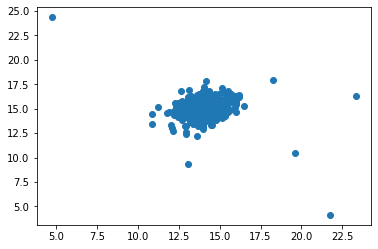

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df[0], df[1])
plt.show()

In [25]:
m = len(df)

s = np.sum(df, axis=0)
mu = s/m
mu

0    14.112226
1    14.997711
dtype: float64

In [26]:
vr = np.sum((df - mu)**2, axis=0)
variance = vr/m
variance

0    1.832631
1    1.709745
dtype: float64

In [27]:
var_dia = np.diag(variance)
var_dia

array([[1.83263141, 0.        ],
       [0.        , 1.70974533]])

In [28]:
k = len(mu)
X = df - mu
p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
p

0      6.470829e-02
1      5.030417e-02
2      7.245035e-02
3      5.031575e-02
4      6.368497e-02
           ...     
302    3.981340e-02
303    5.455673e-08
304    4.461721e-12
305    6.107184e-05
306    2.912867e-23
Length: 307, dtype: float64

In [8]:
def probability(df):
    s = np.sum(df, axis=0)
    m = len(df)
    mu = s/m
    vr = np.sum((df - mu)**2, axis=0)
    variance = vr/m
    var_dia = np.diag(variance)
    k = len(mu)
    X = df - mu
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(var_dia)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(var_dia) * X,axis=1))
    return p

In [9]:
cvx = pd.read_excel('ex8data1.xlsx', sheet_name='Xval', header=None)
cvx.head()

,0,1
0,15.790260,14.921024
1,13.639619,15.329955
2,14.865899,16.473865
3,13.584676,13.989306
4,13.464042,15.635330


In [10]:
cvy = pd.read_excel('ex8data1.xlsx', sheet_name='y', header=None)
cvy.head()

,0
0,0
1,0
2,0
3,0
4,0


In [11]:
p1 = probability(cvx)

In [12]:
y = np.array(cvy)

In [13]:
p.describe()

count    3.070000e+02
mean     5.905331e-02
std      2.324461e-02
min      1.181209e-23
25%      4.361075e-02
50%      6.510144e-02
75%      7.849532e-02
max      8.986095e-02
dtype: float64

In [14]:
def tpfpfn(ep, p):
    tp, fp, fn = 0, 0, 0
    for i in range(len(y)):
        if p[i] <= ep and y[i][0] == 1:
            tp += 1
        elif p[i] <= ep and y[i][0] == 0:
            fp += 1
        elif p[i] > ep and y[i][0] == 1:
            fn += 1
    return tp, fp, fn

In [15]:
eps = [i for i in p1 if i <= p1.mean()]

In [16]:
len(eps)

128

In [17]:
def f1(ep, p):
    tp, fp, fn = tpfpfn(ep, p)
    prec = tp/(tp + fp)
    rec = tp/(tp + fn)
    f1 = 2*prec*rec/(prec + rec)
    return f1

In [18]:
f = []
for i in eps:
    f.append(f1(i, p1))
f

[0.16470588235294117,
 0.208955223880597,
 0.15384615384615385,
 0.3181818181818182,
 0.15555555555555556,
 0.125,
 0.56,
 0.13333333333333333,
 0.16867469879518074,
 0.12612612612612614,
 0.14583333333333331,
 0.22950819672131148,
 0.15053763440860213,
 0.16666666666666666,
 0.3888888888888889,
 0.12389380530973451,
 0.10294117647058823,
 0.19999999999999998,
 0.25925925925925924,
 0.1372549019607843,
 0.17283950617283952,
 0.13592233009708737,
 0.10370370370370369,
 0.17073170731707316,
 0.18918918918918923,
 0.27999999999999997,
 0.12844036697247707,
 0.23333333333333334,
 0.15909090909090906,
 0.10852713178294573,
 0.5833333333333334,
 0.1044776119402985,
 0.25,
 0.1473684210526316,
 0.12173913043478261,
 0.13861386138613863,
 0.10769230769230768,
 0.18666666666666665,
 0.11023622047244096,
 0.24137931034482757,
 0.2121212121212121,
 0.12068965517241378,
 0.3333333333333333,
 0.30434782608695654,
 0.14285714285714285,
 0.17721518987341772,
 0.5185185185185185,
 0.7368421052631577,


In [19]:
np.array(f).argmax()

127

In [20]:
e = eps[127]
e

0.00014529639061630243

In [21]:
label = []
for i in range(len(df)):
    if p[i] <= e:
        label.append(1)
    else:
        label.append(0)
label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [22]:
df['label'] = np.array(label)
df.head()

,0,1,label
0,13.046815,14.741152,0
1,13.408520,13.763270,0
2,14.195915,15.853181,0
3,14.914701,16.174260,0
4,13.576700,14.042849,0
